In [291]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [98]:
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\SIOP 2020')

__Import the data__

In [352]:
data = pd.read_csv('heather_clean_data.csv')

In [353]:
#drop the "unnamed" columns that appear in the data
data.drop(data.columns[data.columns.str.contains('Unnamed') == True], axis = 1, inplace = True)

## Reverse Score Turnover Items
- I am going to reverse score the turnover items so that they reflect "intent to stay" rather than "intent to leave"

In [354]:
#the max for the turnover items is 5, so I will be just subtracting the item scores from 5
max(data.Turnover_1)

5.0

In [355]:
#reverse score the columns
data.loc[:, 'Turnover_1':'Turnover_3'] = 5 - data.loc[:, 'Turnover_1':'Turnover_3']

In [356]:
#map 0 = Male, 1 = Female, 2 = other onto gender
gender_mapper = {1:0, 2:1, 3:2}
data['Gender'].replace(gender_mapper, inplace = True)

In [357]:
data['Gender'].value_counts()

0.0    168
1.0    159
2.0    5  
Name: Gender, dtype: int64

In [358]:
data1 = data.loc[:, 'Learning_1':'Support']
data2 = data.loc[:, 'Belong_1':'Turnover_3']
data3 = data.loc[:, 'MicroInv_1':'Workplace_5']
data4 = data['Gender']
df = pd.concat([data1, data2, data3, data4], axis = 1)

In [359]:
df.head(1)

,Learning_1,Learning_2,Learning_3,Learning_4,Learning_5,Learning_6,Learning_7,Learning_8,Learn_1,Learn_2,Support,Belong_1,Belong_2,Belong_3,Belong_4,Belong_5,Belong_6,Belong_7,Belong_8,Auth_1,Auth_2,Auth_3,Auth_4,Auth_5,Auth_6,Auth_7,Auth_8,Turnover_1,Turnover_2,Turnover_3,MicroInv_1,MicroInv_2,MicroInv_3,MicroInv_4,MicroInv_5,MicroInv_6,MicroInv_7,MicroInv_8,MicroInv_9,Workplace_1,Workplace_2,Workplace_3,Workplace_4,Workplace_5,Gender
0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,6.0,6.0,2.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [360]:
df.shape

(391, 45)

In [361]:
# profile = measure_data.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="measure_report.html")

## Dropping Missing Values

In [362]:
# Printing the percentage of missing values per column
def percent_missing(dataframe):
    '''
    Prints the percentage of missing values for each column in a dataframe
    '''
    # Summing the number of missing values per column and then dividing by the total
    sumMissing = dataframe.isnull().values.sum(axis=0)
    pctMissing = sumMissing / dataframe.shape[0]
    
    if sumMissing.sum() == 0:
        print('No missing values')
    else:
        # Looping through and printing out each columns missing value percentage
        print('Percent Missing Values:', '\n')
        for idx, col in enumerate(dataframe.columns):
            if sumMissing[idx] > 0:
                print('{0}: {1:.2f}%'.format(col, pctMissing[idx] * 100))

In [363]:
percent_missing(df)
df.shape

Percent Missing Values: 

Learning_1: 15.60%
Learning_2: 15.60%
Learning_3: 16.11%
Learning_4: 15.86%
Learning_5: 17.14%
Learning_6: 15.60%
Learning_7: 15.60%
Learning_8: 15.60%
Learn_1: 15.60%
Learn_2: 15.86%
Support: 15.60%
Belong_1: 16.11%
Belong_2: 16.11%
Belong_3: 16.37%
Belong_4: 17.14%
Belong_5: 16.88%
Belong_6: 17.65%
Belong_7: 16.62%
Belong_8: 16.62%
Auth_1: 16.11%
Auth_2: 16.37%
Auth_3: 16.37%
Auth_4: 16.62%
Auth_5: 16.62%
Auth_6: 16.37%
Auth_7: 16.37%
Auth_8: 16.11%
Turnover_1: 15.35%
Turnover_2: 15.60%
Turnover_3: 15.60%
MicroInv_1: 14.58%
MicroInv_2: 14.58%
MicroInv_3: 14.83%
MicroInv_4: 14.58%
MicroInv_5: 14.58%
MicroInv_6: 14.58%
MicroInv_7: 14.58%
MicroInv_8: 14.83%
MicroInv_9: 14.58%
Workplace_1: 14.32%
Workplace_2: 14.32%
Workplace_3: 14.58%
Workplace_4: 14.58%
Workplace_5: 14.32%
Gender: 15.09%


(391, 45)

In [364]:
#drop NAs
df.dropna(inplace = True)
percent_missing(df)
df.reset_index(drop = True, inplace = True)
df.shape

No missing values


(292, 45)

In [365]:
df.shape

(292, 45)

## How many people felt support?
- 1 = felt support
- 2 = did not

In [366]:
df['Support'].value_counts()

1.0    211
2.0    81 
Name: Support, dtype: int64

## Calculating Mean, Standard Deviation for Each Group

In [367]:
#mean, std for learning_1 through Learn_2
df['learning_mean'] = df.loc[:, 'Learning_1':'Learn_2'].mean(axis = 1)
df['learning_std'] = round(df.loc[:, 'Learning_1':'Learn_2'].std(axis = 1), 3)

#mean, std for Turnover_1 through Turnover_3
df['turnover_mean'] = df.loc[:, 'Turnover_1':'Turnover_3'].mean(axis = 1)
df['turnover_std'] = round(df.loc[:, 'Turnover_1':'Turnover_3'].std(axis = 1), 3)

#mean, std for Authenticity and Belonging questions
df['inclusion_mean'] = df.loc[:, 'Belong_1':'Auth_8'].mean(axis = 1)
df['inclusion_std'] = round(df.loc[:, 'Belong_1':'Auth_8'].std(axis = 1), 3)

#get count, std for MicroInv - Workplace 
df['micro_std'] = round(df.loc[:, 'MicroInv_1':'Workplace_5'].std(axis = 1), 3)
#now getting count
mapper = {2.0:0.0} #create mapper to replace 2s with 0s
df['micro_count'] = df.loc[:, 'MicroInv_1':'Workplace_5'].replace(mapper).sum(axis = 1) #replace values = 2 with 0 so that our count is only for 1s in the rows

## Correlation Matrix for Means and Standard Deviations

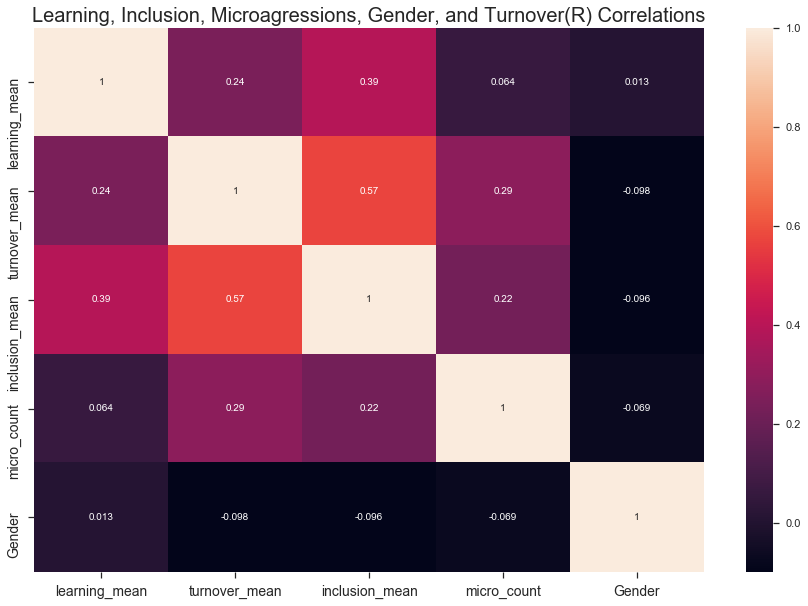

In [368]:
corr_data = df[['learning_mean', 'turnover_mean', 'inclusion_mean', 'micro_count', 'Gender']]

#plot the heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(corr_data.corr(), annot = True)
plt.title('Learning, Inclusion, Microagressions, Gender, and Turnover(R) Correlations', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## Getting Cronbach's Alpha for Learning, Belonging+Authenticity, and Turnover

In [214]:
#get chronbachs alpha for subsets of measures
def cronbach_alpha(items):
    items = pd.DataFrame(items)
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    
    return (items_count / float(items_count - 1) *
            (1 - variance_sum / total_var))

In [215]:
#get alpha for "learning" variables
learning_alpha = cronbach_alpha(df.loc[:, 'Learning_1':'Learn_2'])
print(f"Cronbach's Alpha for Learning: {learning_alpha}")

print('  ')

#get alpha for "Turnover"
turnover_alpha = cronbach_alpha(df.loc[:, 'Turnover_1':'Turnover_3'])
print(f"Cronbach's Alpha for Turnover: {turnover_alpha}")

print('   ')

#get alpha for belonging and authenticity
belonging_alpha = cronbach_alpha(df.loc[:, 'Belong_1':'Auth_8'])
print(f"Cronbach's Alpha for Belonging and Authenticity: {belonging_alpha}")

Cronbach's Alpha for Learning: 0.9183583300530999
  
Cronbach's Alpha for Turnover: 0.913896190132657
   
Cronbach's Alpha for Belonging and Authenticity: 0.9756246689250677


# Begin Factor Analysis

In [223]:
#using bartlett test to confirm that we should use a factor analysis, 0 p value indicates we should
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
features = df.loc[:, 'Learning_1':'Learn_2']

chi_square_value,p_value=calculate_bartlett_sphericity(features)
chi_square_value, p_value

(3198.205033084083, 0.0)

In [224]:
#KMO test, values above 60 are great and indicate that the data is stable enough for a factor analysis
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(features)
kmo_model

0.897048521711588

## Getting Eigenvalues

In [230]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(features, 10, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,6.602376
1,1.715290
2,0.475337
3,0.312299
4,0.215902
5,0.196922
6,0.148810
7,0.120158
8,0.115667
9,0.097238


## Scree Plot
- We can see from the scree plot that there are only two factors who's eigenvalues are above 1, thus 2 factors are explaining most of the variance in the data, so 2 factors makes sense
- we could have also just used the eigenvalue table above, but its more fun to see it plotted out

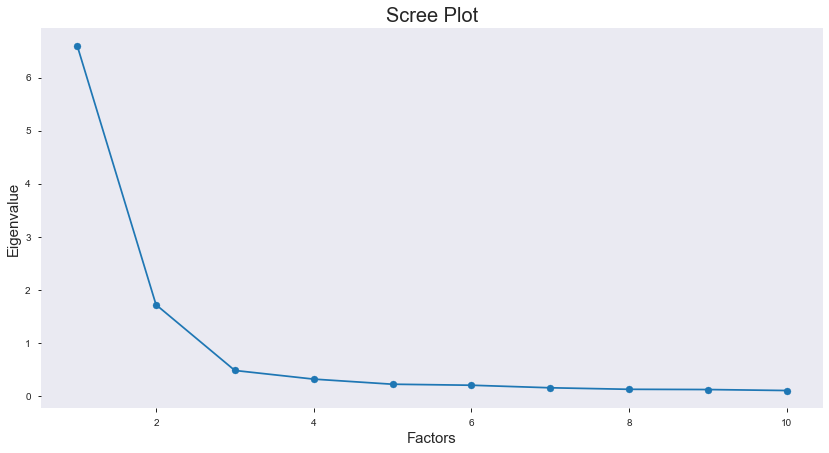

In [233]:
# Create scree plot using matplotlib
plt.figure(figsize = (14, 7))
plt.scatter(range(1,features.shape[1]+1),ev)
plt.plot(range(1,features.shape[1]+1),ev)
plt.title('Scree Plot', fontsize = 20)
plt.xlabel('Factors', fontsize = 15)
plt.ylabel('Eigenvalue', fontsize = 15)
plt.grid()
plt.show()

## Factor Analysis with 2 Factors
- using Maximum Likelihood and a promax rotation (since factors will be correlated with each other theoretically)

In [225]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(features, 2, method = 'ml', rotation = 'promax')
fa.loadings

,Factor1,Factor2
Learning_1,0.003322,0.839280
Learning_2,0.046853,0.878223
Learning_3,0.027983,0.890850
Learning_4,0.036455,0.864489
Learning_5,0.012668,0.861532
Learning_6,-0.027138,0.914008
Learning_7,-0.043973,0.910201
Learning_8,-0.048071,0.878275
Learn_1,0.998094,-0.002154
Learn_2,0.887750,-0.000909


In [280]:
composite_df = df[['turnover_mean', 'inclusion_mean', 'learning_mean', 'micro_count']]

In [283]:
composite_df.to_csv('composite_df.csv')

In [188]:
features.to_csv('factor_analysis_data.csv')

In [287]:
composite_df.head()

,turnover_mean,inclusion_mean,learning_mean,micro_count
0,4.0,3.8750,2.6,14.0
1,0.0,1.8125,2.6,6.0
2,3.0,4.5000,4.2,14.0
3,3.0,4.0000,4.0,14.0
4,3.0,4.5000,3.6,14.0


## Run Mediation
- using pingouin to conduct mediation analysis
- Regressing inclusion on learning for "a" path
- Regressing turnover on learning + inclusion for "b" path
    - B weight in the output is "c" path
- Running a mediation analysis with the IV (learning), Mediator (inclusion), and DV (turnover)

In [300]:
import pingouin as pg
#Baron and Kenny Method.
#First, regress inclusion on learning to obtain a path.
pg.linear_regression(composite_df['learning_mean'], composite_df['inclusion_mean'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.725723,0.155111,17.572778,1.426815e-47,0.155023,0.152109,2.420438,3.031008
1,learning_mean,0.370276,0.050763,7.294151,2.883438e-12,0.155023,0.152109,0.270364,0.470187


In [295]:
#Next, obtain c path by regressing turnover on learning and inclusion
pg.linear_regression(composite_df[['learning_mean', 'inclusion_mean']], composite_df['turnover_mean'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1.200325,0.296576,-4.047283,6.657832e-05,0.329997,0.32536,-1.784047,-0.616603
1,learning_mean,0.030001,0.073482,0.408283,6.833683e-01,0.329997,0.32536,-0.114626,0.174629
2,inclusion_mean,0.843858,0.078136,10.799830,4.593133e-23,0.329997,0.32536,0.690069,0.997646


__Indirect effect is significant__

In [294]:
# https://github.com/raphaelvallat/pingouin
# Conduct bootsrapping procedure to determine significance of indirect effect
# (apath * bpath).
pg.mediation_analysis(data=composite_df, x = 'learning_mean', m = 'inclusion_mean', y = 'turnover_mean', seed=42, n_boot=5000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,inclusion_mean ~ X,0.3703,0.0508,2.883438e-12,0.2704,0.4702,Yes
1,Y ~ inclusion_mean,0.8564,0.0717,5.318869e-27,0.7153,0.9976,Yes
2,Total,0.3425,0.0799,2.469456e-05,0.1852,0.4997,Yes
3,Direct,0.0300,0.0735,6.833683e-01,-0.1146,0.1746,No
4,Indirect,0.3125,0.0492,0.000000e+00,0.2195,0.4128,Yes
